In [4]:
import pandas as pd
import seaborn as sns

In [5]:
student_data = pd.read_csv("student_exam_scores.csv")

In [6]:
student_data

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...,...
195,S196,10.5,5.4,94.0,87,42.7
196,S197,7.1,6.1,85.1,92,40.4
197,S198,1.6,6.9,63.8,76,28.2
198,S199,12.0,7.3,50.5,58,42.0


<Axes: xlabel='hours_studied', ylabel='exam_score'>

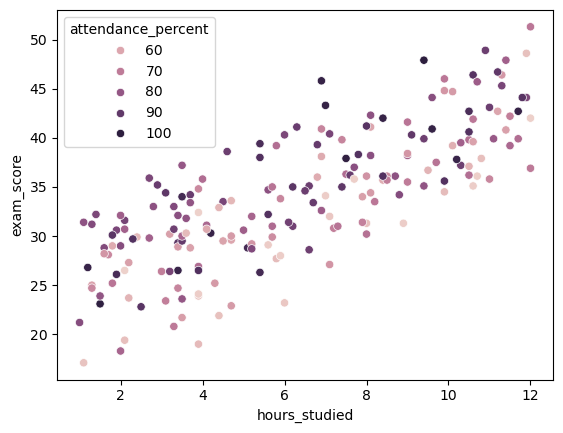

In [19]:
sns.scatterplot(x=student_data["hours_studied"],y=student_data["exam_score"],hue=student_data["attendance_percent"])

In [8]:
X = student_data.drop(columns=["student_id","sleep_hours","exam_score"])
y = student_data["exam_score"]

In [9]:
X.head()

,hours_studied,attendance_percent,previous_scores
0,8.0,72.1,45
1,1.3,60.7,55
2,4.0,73.7,86
3,3.5,95.1,66
4,9.1,89.8,71


In [10]:
y.head()

0    30.2
1    25.0
2    35.8
3    34.0
4    40.3
Name: exam_score, dtype: float64

In [11]:
#train text split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [12]:
X_train.head()

,hours_studied,attendance_percent,previous_scores
79,3.7,88.3,84
197,1.6,63.8,76
38,10.5,72.8,59
24,11.5,74.7,77
122,9.6,82.5,90


In [13]:
#train model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
y_pred = model.predict(X_test)

In [15]:
y_pred

array([29.21609609, 28.05697156, 37.35305772, 32.80043697, 38.30088607,
       40.58588898, 26.30242739, 45.56330019, 42.02413899, 26.94996379,
       25.79731265, 45.5741751 , 27.07012175, 30.589829  , 38.68555358,
       35.26516146, 33.06366939, 27.0822521 , 39.33734726, 29.55682855,
       24.19470335, 24.23902912, 27.38940267, 29.13204419, 35.4316367 ,
       42.15911869, 35.07549915, 26.53194687, 36.17993208, 42.82495026,
       25.50291864, 39.41446078, 35.22509348, 30.62879368, 41.1964625 ,
       23.65479056, 36.82268833, 35.46881938, 45.41921729, 38.02858243])

In [16]:
y_test.head()

95     28.7
15     34.1
30     34.5
158    29.5
128    36.1
Name: exam_score, dtype: float64

In [17]:
#Evaluate
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred)
print("r-squred: ", r2)

n = X_test.shape[0]
p = X_test.shape[1]

adj_r = 1 - ((1 - r2) * (n - 1)/(n-p-1))

print("Adjusted r-squred:", r2)

r-squred:  0.7918226819398724
Adjusted r-squred: 0.7918226819398724


In [18]:
X.head()

,hours_studied,attendance_percent,previous_scores
0,8.0,72.1,45
1,1.3,60.7,55
2,4.0,73.7,86
3,3.5,95.1,66
4,9.1,89.8,71


In [20]:
X = student_data.drop(columns=["student_id","sleep_hours","exam_score"])
y = student_data["exam_score"]

X["attendace_and_hours_studies"] = X["hours_studied"] * X["attendance_percent"]
X["attendance_percent_and_previous_scores"] = X["previous_scores"] * X["attendance_percent"]

In [22]:
X.head()

,hours_studied,attendance_percent,previous_scores,attendace_and_hours_studies,attendance_percent_and_previous_scores
0,8.0,72.1,45,576.80,3244.5
1,1.3,60.7,55,78.91,3338.5
2,4.0,73.7,86,294.80,6338.2
3,3.5,95.1,66,332.85,6276.6
4,9.1,89.8,71,817.18,6375.8


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)